### BEGIN OF LIBRARY 
_____________________________________________________________________________________________________________________________________________

In [1]:
import numpy as np

### CLASSES: Point, Line, Curve

#### Point

In [185]:
class Point:
    
    def __init__(self, x, y):
        
        if not isinstance(x,(int,float)):
            raise TypeError("Point first argument must be integer or float")
            
        if not isinstance(y,(int,float)):
            raise TypeError("Point second argument must be integer or float")
            
        self.__x = x
        self.__y = y
        self.__z = 0
        
    def show(self):
        print("(", self.__x, self.__y, ")")
        
    def get_x(self):
        return self.__x
    
    def get_y(self):
        return self.__y
    
    def set_x(self,x):
        self.__x = x
        
    def set_y(self,y):
        self.__y = y
        
    def __str__(self):
        return "(" + str(self.__x) + " " + str(self.__y) + ")"
    
    def set_z(self,z):
        self.z = z
        
    def get_z(self):
        return self.z

#### Line:

In [3]:
class Line:
    def __init__(self, p1, p2):
        
        if not isinstance(p1, Point):
            raise TypeError("p1 must be Point!")
        if not isinstance(p1, Point):
            raise TypeError("p2 must be Point!")
            
        self.__p1 = p1
        self.__p2 = p2
        
        
    def get_p1(self):
        return self.__p1
    
    def get_p2(self):
        return self.__p2
    
    def set_p1(self, p1):
        if not isinstance(p1, Point):
            raise TypeError("p1 must be Point!")
        self.__p1 = p1
    
    def set_p2(self, p2):
        if not isinstance(p2, Point):
            raise TypeError("p2 must be Point!")
        self.__p2 = p2
    
    
    def show(self):        
        p_1_x = self.__p1.get_x()
        p_1_y = self.__p1.get_y()
        
        p_2_x = self.__p2.get_x()
        p_2_y = self.__p2.get_y()
        
        print("Line between:")
        print("p1 = (", p_1_x, p_1_y, ")")
        print("p2 = (", p_2_x, p_2_y, ")")
        
    def write(self,fname):
        xlist = [self.__p1.get_x(),self.__p2.get_x()]
        ylist = [self.__p1.get_y(),self.__p2.get_y()]
            
        c = [xlist, ylist] 
        with open(fname, "w") as file:
            for x in zip(*c):
                file.write("{0}\t{1}\n".format(*x))
          

#### Curve:

In [4]:
class Curve:
    
    def __init__(self, name):
        self.__name = name
        self.__points = list()
        
        
    def get_name(self):
        return self.__name
    
    
    def get_points(self):
        return self.__points
    
    
    def add(self, p):
        
        if not isinstance(p, Point):
            raise TypeError("p must be a point")
        else: 
            self.__points.append(p)
    
    
    #Region: x-min-max:
    def get_x_min(self):
        
        if len(self.get_points()) != 0:
            xlist = np.array([])
            
            for i in self.get_points():
                xlist = np.append(xlist, i.get_x())
                
            return min(xlist)
    
    
    def get_x_max(self):
        if len(self.get_points()) != 0:
            xlist = np.array([])
            
            for i in self.get_points():
                xlist = np.append(xlist,i.get_x())
                
            return max(xlist)
    
    
    #region: y-min-max:
    def get_y_min(self):
        
        if len(self.get_points()) != 0:
            ylist = np.array([])
            
            for i in self.get_points():
                ylist = np.append(ylist, i.get_y())
                
            return min(ylist)
    
    
    def get_y_max(self):
        
        if len(self.get_points()) != 0:
            ylist = np.array([])
            
            for i in self.get_points():
                ylist = np.append(ylist,i.get_y())
                
            return max(ylist)
    
    
    #Plot method may be added.... 
    
    
    def show(self):
        for i in self.__points:
            i.show()
    
    def write(self,fname): 
        xypoints = self.get_points()
        
        xlist = np.array([])
        ylist = np.array([])
            
        for i in xypoints:
            xlist = np.append(xlist, i.get_x())
            
        for i in xypoints:
            ylist = np.append(ylist, i.get_y())
         
        c = [xlist, ylist] 
        with open(fname, "w") as file:
            for x in zip(*c):
                file.write("{0}\t{1}\n".format(*x))
         
        
    def get_point_by_index(self, index):
        return self.get_points()[index]
    

#### STATIC CLASSES: OPERATIONS (Line_Line_Intersect, Curve_Line_intersect)

In [213]:
class Operations:
    
#Region: Code returns point (cx,cy) if intersection point found & returns none intersection point not found
    @staticmethod
    def Line_Line_Intersect(L1, L2):
        
        #Region: For Line-1:
        x1 = L1.get_p1().get_x()
        y1 = L1.get_p1().get_y()
        
        x2 = L1.get_p2().get_x()
        y2 = L1.get_p2().get_y()
        
        #Region: For Line-2:
        x3 = L2.get_p1().get_x()
        y3 = L2.get_p1().get_y()
        
        x4 = L2.get_p2().get_x()
        y4 = L2.get_p2().get_y()
        
        #Region: Check points for Line-1:
        if x1 >= x2:
            tx = x1; ty = y1; x1 = x2; y1 = y2; x2 = tx; y2 = ty
          
        #Region: Check points for Line-2:
        if x3 >= x4:
            tx = x3; ty = y3; x3 = x4; y3 = y4; x4 = tx; y4 = ty
            
        #Region: Check & find tangent for Line-1:
        if y1 == y2: k1 = 0;
        else: k1 = (y2 - y1)/(x2 - x1)
                
        #Region: Check & find tangent for Line-2: 
        if y3 == y4: k2 = 0
        else: k2 = (y4 - y3)/(x4 - x3)
            
        #Region: Check for parallelism:
        if k1 == k2: return None    
        
        #Region: Find out intersect point:
        b1 = y1 - k1 * x1
        b2 = y3 - k2 * x3
        
        cx = (b2 - b1)/(k1 - k2)
        cy = k1 * cx + b1
        
        if (cx < x1) or (cx < x3) or (cx > x2) or (cx > x4): return None
        else: return Point(cx, cy)
        
#Region: Code returns point (cx,cy) if intersection point found & returns none intersection point not found
    @staticmethod
    def Curve_Line_Intersect(C, L):
        
        #Region: Check the curve for empty:
        if C == None: print("The Curve is none"); return None       
        if L == None: print('The Line is none');  return None
        
        plist = C.get_points()
        
        if len(plist) <= 1: print("Empty curve"); return None
               
        for i in range(1,len(plist)):
            segment = Line(plist[i], plist[i-1])
            cp = Operations.Line_Line_Intersect(segment, L)
            
            if cp != None: print('Intersection point has been found!'); return cp
            
        print('No Intersection point')
        return None
    
    
    @staticmethod
    def Curve_Curve_Intersect(C1, C2):  #first is curve, second is line
        
        PointOfC1 = C1.get_points()
        PointOfC2 = C2.get_points()
        
        C_1_y = np.array([])
        C_2_y = np.array([])
        
        if len(PointOfC1) != 0:     
            for i in PointOfC1:
                C_1_y = np.append(C_1_y, i.get_y())
#                 print('c1y = ',C_1_y)
        else: raise TypeError("Length PointOfC1 has 0!")
            
        if len(PointOfC2) != 0:
            for i in PointOfC2:
                C_2_y = np.append(C_2_y, i.get_y())
#                 print('c2y = ',C_2_y)
        else: raise TypeError("Length PointOfC2 has 0!")
        
#         print(np.sign(C_1_y - C_2_y))
#         print("#######")
#         print(np.diff(np.sign(C_1_y - C_2_y)))
#         print("#######")
#         print(np.argwhere(np.diff(np.sign(C_1_y - C_2_y))))
#         print("#######")
#         print(np.argwhere(np.diff(np.sign(C_1_y - C_2_y))).flatten())
        Left_Index = np.argwhere(np.diff(np.sign(C_1_y - C_2_y))).flatten()

        return Left_Index
          

### END OF LIBRARY
_____________________________________________________________________________________________________________________________________________

### BEGIN OF ASTROPHYSICAL CODE
_____________________________________________________________________________________________________________________________________________

### Imports:

In [258]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg') #setting vector type of the output plot - usefull for scaling pictures SVG
from astropy.io import fits
from astropy.table import Table
import seaborn as sns
sns.set(style="ticks", context="talk", font_scale=1)

from scipy.integrate import quad

import sys
np.set_printoptions(threshold=sys.maxsize) #to display all table without interruptions




/var/folders/q3/mnhc5cbn57x2lb_psm18b2q80000gn/T/ipykernel_31125/2478273904.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg') #setting vector type of the output plot - usefull for scaling pictures SVG


#### Constants:

In [259]:
# Cosmology constants
# from Planck 2015
H0 = 67.8; # km/s/Mpc
omegaM, omegaK, omegaL = 0.308, 0, 0.692
c = 2.998e10
pi=np.pi
kevToErg = 1.602e-9
mpcToCm = 3.086e24
kmToCm = 1e5

#### FIELDS

In [260]:
# Calculas parameters:
zmin = 0.01   ###0.001
zmax = 10.000 ###10.0
dz = 0.001     ###0.0001

x_reducer = 1e52

xmin = 1e48
xmax = 1e54
xmin = xmin/x_reducer
xmax = xmax/x_reducer

x1 = xmin
x2 = xmax

y1 = 10**(3.23197)*(x1)**0.50569
y2 = 10**(3.23197)*(x2)**0.50569

MLPoint1 = Point(x1,y1)
MLPoint2 = Point(x2,y2)
#Main_Line = Line(MLPoint1, MLPoint2)

#### Astrophysical models:

In [261]:
class models:
    
    work_models = ['flnc_comp', 'flnc_band'] #['FLNC_COMP', 'FLNC_BAND']
    
    @staticmethod
    def _luminosityDistance(redshift):
        dH = c*mpcToCm/kmToCm/H0
        function = lambda x: (1/np.sqrt(omegaM*(1+x)**3+omegaK*(1+x)**2+omegaL))
        lower, upper = 0, redshift
        luminosityDistance =  dH *(1+redshift) * quad(function,lower,upper)[0]
        return luminosityDistance
    
    @staticmethod
    def _luminosityArea(redshift):
        luminosityDistance = models._luminosityDistance(redshift)
        luminosityArea = 4 * pi * luminosityDistance**2
        return luminosityArea
    
    @staticmethod
    def get_epeak(z,epeak):
        return float(epeak)*(1+float(z))
    
    # ------------------ CUTOFF POWER-LAW ------------------
    @staticmethod
    def _cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper):
    ## model parameters are from the fitting result in observer's frame.
    ## integration from lower/(1+z) to upper/(1+z) in the observer's frame,
    ## which are the corrsponding energy from lower to upper in the rest frame. 
    ## set redshift = 0 in order to compute the flux in observer's frame.
    
    # if no data or bad data, return.
        if (normalization <= 0 ): return 0
        if (ePeak <= 0 ): return 0
        lower, upper = lower/(1+redshift), upper/(1+redshift)
        function = lambda x: normalization*x*(x/ePiv)**(-alpha)*np.exp(-x*(2-alpha)/ePeak)

    #QAGS adaptive integration
        flux = quad( function, lower, upper)[0]
        return flux
    
    @staticmethod
    def _cutoffPLEnergy(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper):
    # in order to have isotropic energy in the rest frame from E1 to E2,
    # we need to integrate in the observer's frame from E1/(1+z) to E2/(1+z), then divide by (1+z) for the total energy.
    # (E/50.0)**(-a)*np.exp(-E*(2.0-a)/b)
    # alpha is usually positive by default
        
        flux = models._cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper)
        area = models._luminosityArea(redshift)
        isotropicEnergy =  kevToErg * area *  duration * flux / (1+redshift)

        return  isotropicEnergy
    
    ########################
    ########################
    ########################
    ###here we calculate the time-integrated luminosity with COMP model
    ########################
    ########################
    ########################
    @staticmethod
    def _cutoffPLLuminosity(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper):
    # in order to have isotropic energy in the rest frame from E1 to E2,
    # we need to integrate in the observer's frame from E1/(1+z) to E2/(1+z), then divide by (1+z) for the total energy.
    # (E/50.0)**(-a)*np.exp(-E*(2.0-a)/b)
    # alpha is usually positive by default
        
        flux = models._cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper)
        area = models._luminosityArea(redshift)
        isotropicLuminosity =  kevToErg * area * flux

        return  isotropicLuminosity
    ########################
    ########################
    ########################
    ########################
    ########################
    ########################
    
    @staticmethod
    def _cutoffPLFluxErr(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dEpeak, dNormalization):
    ## model parameters are from the fitting result in observer's frame.
    ## integration from lower/(1+z) to upper/(1+z) in the observer's frame,
    ## which are the corrsponding energy from lower to upper in the rest frame. 
    ## set redshift = 0 in order to compute the flux in observer's frame.
    
    # if no data or bad data, return.
        if (normalization <= 0 ): return 0
        if (ePeak <= 0 ): return 0
        if (dAlpha == ""): return 0
        if (dEpeak == ""): return 0 
        if (dNormalization == ""): return 0
    
        lower, upper = lower/(1+redshift), upper/(1+redshift)

    # Rest frame
    ## Uncertainty from normalization
        f_dF_dNorm = lambda x: x*(x/ePiv)**(-alpha)*np.exp(x*(alpha-2)/ePeak) 
    #QAGS adaptive integration
        dF_dNorm = quad( f_dF_dNorm, lower, upper)[0]

    ## Uncertainty from alpha
        f_dF_dAlpha = lambda x: (np.log(x/ePiv)-x/ePeak) * normalization*x*(x/ePiv)**(-alpha)*np.exp(x*(alpha-2)/ePeak)   
    #QAGS adaptive integration
        dF_dAlpha = quad( f_dF_dAlpha, lower, upper)[0]

    ## Uncertainty from ePeak
        f_dF_dEpeak = lambda x: (x*(2-alpha)/ePeak**2)*normalization*x*(x/ePiv)**(-alpha)*np.exp(x*(alpha-2)/ePeak)
    #QAGS adaptive integration
        dF_dEpeak = quad( f_dF_dEpeak, lower, upper)[0]

        fluxErr = np.sqrt((dF_dNorm*dNormalization)**2+(dF_dAlpha*dAlpha)**2+(dF_dEpeak*dEpeak)**2)

        return fluxErr

    @staticmethod
    def _cutoffPLEnergyErr(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dEpeak, dNormalization):
    
    # in order to have isotropic energy in the rest frame from E1 to E2,
    # we need to integrate in the observer's frame from E1/(1+z) to E2/(1+z), then divide by (1+z) for the total energy.
    # (E/50.0)**(-a)*np.exp(-E*(2.0-a)/b)
    # alpha is usually positive by default
    
        cutoffPLFluxErr = _cutoffPLFluxErr(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dEpeak, dNormalization)
        area = _luminosityArea(redshift)
        isotropicEnergyErr =  kevToErg * area * duration * cutoffPLFluxErr / (1+redshift) 
    
        return isotropicEnergyErr
    
    @staticmethod
    def _cutoffPLK(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper):
    
        fluxObs = _cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, 0, lower, upper)
        fluxRest = _cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper)

        if fluxObs == 0: return 0
        k = fluxRest/fluxObs
    
        return k
    
    @staticmethod
    def _cutoffPLKErr(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dEpeak, dNormalization):
    
        fluxObs = _cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, 0, lower, upper)
        fluxObsErr = _cutoffPLFluxErr(alpha, ePeak, ePiv, normalization, duration, 0, lower, upper, dAlpha, dEpeak, dNormalization)
        fluxRest = _cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper)
        fluxRestErr = _cutoffPLFluxErr(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dEpeak, dNormalization)
    
        if fluxObs == 0: return 0
    
    # uncertainty from flux in observer's frame
        kObsErr = - fluxObsErr*fluxRest/fluxObs**2
    
    # uncertainty from flux in observer's frame
        kRestErr =  fluxRestErr/fluxObs
    
        kErr = np.sqrt(kObsErr**2+kRestErr**2)
    
        return kErry
    
    
    
    #------------------ Band Function -----------------#
    @staticmethod
    def _bandFlux(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper):
    ## model parameters are from the fitting result in observer's frame.
    ## integration from lower/(1+z) to upper/(1+z) in the observer's frame,
    ## which are the corrsponding energy from lower to upper in the rest frame. 
    ## set redshift = 0 in order to compute the flux in observer's frame.
    
    # if no data or bad data, return.
        if normalization <= 0: return 0
        if (ePeak <= 0 ): return 0 
        if (upper == ""): return 0 

        middle = (alpha-beta)*ePeak/(2+alpha)
    #print(middle)
    # if alpha < beta, middle will be negtive. 
        if (middle < lower): middle = lower
        if (upper < middle): middle = upper 

        lower, middle, upper = lower/(1+redshift), middle/(1+redshift), upper/(1+redshift)

        functionLow = lambda x: normalization*x*(x/ePiv)**alpha*np.exp(-x*(2+alpha)/ePeak)
        functionHigh = lambda x: normalization*x*((alpha-beta)*ePeak/(2+alpha)/ePiv)**(alpha-beta)*np.exp(beta-alpha)*(x/ePiv)**beta
    
        resultLow = quad( functionLow, lower, middle )[0]
        resultHigh = quad( functionHigh, middle, upper)[0]

        flux = resultLow + resultHigh
        return flux
    
    @staticmethod
    def _bandEnergy(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper):
    # in order to have isotropic energy in the rest frame from E1 to E2,
    # we need to integrate in the observer's frame from E1/(1+z) to E2/(1+z), then divide by (1+z) for the total energy.
    # Low: A(E/50)^a*exp(-E(2+a)/Ep)
    # High: A((a-b)Ep/(2+a)/50)^(a-b)*exp(b-a)(E/50)^b
    # Ebreak: (a-b)Ep/(2+a)
    # alpha and beta are usually negtive by default
    
        flux = models._bandFlux(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper)
        area = models._luminosityArea(redshift)
        isotropicEnergy =  kevToErg * area *  duration * flux / (1+redshift) 
        return isotropicEnergy

    ########################
    ########################
    ########################
    ###here we calculate the time-integrated luminosity with BAND nodel
    ########################
    ########################
    ########################
    @staticmethod
    def _bandLuminosity(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper):
    # in order to have isotropic energy in the rest frame from E1 to E2,
    # we need to integrate in the observer's frame from E1/(1+z) to E2/(1+z), then divide by (1+z) for the total energy.
    # (E/50.0)**(-a)*np.exp(-E*(2.0-a)/b)
    # alpha is usually positive by default
        
        flux = models._bandFlux(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper)
        area = models._luminosityArea(redshift)
        isotropicLuminosity =  kevToErg * area * flux

        return  isotropicLuminosity
    ########################
    ########################
    ########################
    ########################
    ########################
    ########################
    
    @staticmethod
    def _bandFluxErr(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dBeta, dEpeak, dNormalization):
        
    ## model parameters are from the fitting result in observer's frame.
    ## integration from lower/(1+z) to upper/(1+z) in the observer's frame,
    ## which are the corrsponding energy from lower to upper in the rest frame. 
    ## set redshift = 0 in order to compute the flux in observer's frame.
    
    
    # if no data or bad data, return.
        if (normalization <= 0 ): return 0 
        if (ePeak <= 0 ): return 0 
        if (dAlpha == ""): return 0 
        if (dBeta == ""): return 0 
        if (dEpeak == ""): return 0 
        if (dNormalization == ""): return 0 
    
        middle = (alpha-beta)*ePeak/(2+alpha)
    # if alpha < beta, middle will be negtive. 
        if (middle < lower): middel = lower
        if (upper < middle): middle = upper 

    #Rest frame
        lower, middle, upper = lower/(1+redshift), middle/(1+redshift), upper/(1+redshift)

    ## dA_dB means dA/dB
        dF_dg = normalization*(1/ePiv)**alpha*((alpha-beta)/(2+alpha))**(alpha+1)*(ePeak/(1+redshift))**(alpha)*np.exp((beta-alpha)/(1+redshift))
        dg_dAlpha = (1/(1+redshift))*(2+beta)*ePeak/(2+alpha)**2
        dg_dBeta = - (1/(1+redshift))*ePeak/(2+alpha)
        dg_dEpeak = (1/(1+redshift))*(alpha-beta)/(2+alpha)

    ## Uncertainty from normalization
        f_dh_dNorm = lambda x:  x*(x/ePiv)**alpha*np.exp(-x*(2+alpha)/ePeak)
        dF_dNorm= quad(f_dh_dNorm, lower, middle)[0]

    ## Uncertainty from alpha
        f_dh_dAlpha = lambda x: (np.log(x/ePiv)-x/ePeak)*normalization*x*(x/ePiv)**alpha*np.exp(-x*(2+alpha)/ePeak)
        dF_dAlpha = quad( f_dh_dAlpha, lower, middle )[0]
    
    ## Uncertainty from beta
        dF_dBeta =  dF_dg*dg_dBeta

    ## Uncertainty from ePeak
        f_dh_dEpeak = lambda x: ((2+alpha)*x/ePeak**2)*normalization*x*(x/ePiv)**alpha*np.exp(-x*(2+alpha)/ePeak)
        dF_dEpeak = quad( f_dh_dEpeak, lower, middle)[0] + dF_dg*dg_dEpeak


    ## Uncertainty of the lower enerngy part
        fluxLowErr = np.sqrt((dF_dNorm*dNormalization)**2+(dF_dAlpha*dAlpha)**2+(dF_dBeta*dBeta)**2+(dF_dEpeak*dEpeak)**2)
    
    ## dA_dB means dA/dB
        dI_dj = normalization*(1/ePiv)**alpha*(1/(1+redshift))**(beta+1)*((alpha-beta)/(2+alpha))**(alpha+1)*ePeak**(alpha+1)*np.exp(beta-alpha)
        dj_dAlpha = ePeak*(2+beta)/((2+alpha)**2*(1+redshift))
        dj_dBeta = - ePeak/((2+alpha)*(1+redshift))
        dj_dEpeak = (alpha-beta)/((2+alpha)*(1+redshift))
    
    ## Uncertainty from normalization
        f_dk_dNorm = lambda x: (ePeak/ePiv)**(alpha-beta)*(((alpha-beta)/(2+alpha))**(alpha-beta))*np.exp(beta-alpha)*x*(x/ePiv)**beta 
        dI_dNorm = quad( f_dk_dNorm, middle, upper)[0]

    ## Uncertainty from alpha
        f_dk_dAlpha = lambda x:  ((beta-alpha)/(2+alpha)+np.log(ePeak*(alpha-beta)/(ePiv*(2+alpha))))*normalization*x*(ePeak/ePiv)**(alpha-beta)*((alpha-beta)/(2+alpha))**(alpha-beta)*np.exp(beta-alpha)*(x/ePiv)**beta
        dI_dAlpha = quad( f_dk_dAlpha, middle, upper)[0] - dI_dj*dj_dAlpha

    ## Uncertainty from beta
        f_dk_dBeta = lambda x: (np.log(x*(2+alpha)/(ePeak*(alpha-beta))))*normalization*x*(ePeak/ePiv)**(alpha-beta)*((alpha-beta)/(2+alpha))**(alpha-beta)*np.exp(beta-alpha)*(x/ePiv)**beta
        dI_dBeta = quad( f_dk_dBeta, middle, upper)[0] - dI_dj*dj_dBeta

    ## Uncertainty from ePeak
        f_dk_dEpeak = lambda x: ((alpha-beta)/ePeak)*normalization*x*(ePeak/ePiv)**(alpha-beta)*((alpha-beta)/(2+alpha))**(alpha-beta)*np.exp(beta-alpha)*(x/ePiv)**beta
        dI_dEpeak = quad( f_dk_dEpeak, middle, upper )[0] - dI_dj*dj_dEpeak
    
    ## Uncertainty from high energy part
        fluxHighErr = np.sqrt((dI_dNorm*dNormalization)**2+(dI_dAlpha*dAlpha)**2+(dI_dBeta*dBeta)**2+(dI_dEpeak*dEpeak)**2)

    ## Fial uncertainty 
        fluxErr = np.sqrt(fluxLowErr**2+fluxHighErr**2)

        return fluxErr
    
    @staticmethod
    def _bandEnergyErr(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dBeta, dEpeak, dNormalization):
    # in order to have isotropic energy in the rest frame from E1 to E2,
    # we need to integrate in the observer's frame from E1/(1+z) to E2/(1+z), then divide by (1+z) for the total energy.
    # Low: A(E/50)^a*np.exp(-E(2+a)/Ep)
    # High: A((a-b)Ep/(2+a)/50)^(a-b)*np.exp(b-a)(E/50)^b
    # Ebreak: (a-b)Ep/(2+a)
    # alpha and beta are usually negtive by default
        
        area = _luminosityArea(redshift)
        bandFluxErr = _bandFluxErr(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dBeta, dEpeak, dNormalization)
        isotropicEnergyErr = kevToErg * area * duration * bandFluxErr / (1+redshift) 

        return isotropicEnergyErr

    @staticmethod
    def _bandK(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper):
    
        fluxObs = _bandFlux(alpha, beta, ePeak, ePiv, normalization, duration, 0, lower, upper)
        fluxRest = _bandFlux(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper)

        if fluxObs == 0 : return 0 
        k = fluxRest/fluxObs
        return k

    @staticmethod
    def _bandKErr(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dBeta, dEpeak, dNormalization):
    
        fluxObs = _bandFlux(alpha, beta, ePeak, ePiv, normalization, duration, 0, lower, upper)
        fluxObsErr = _bandFluxErr(alpha, beta, ePeak, ePiv, normalization, duration, 0, lower, upper, dAlpha, dBeta, dEpeak, dNormalization)
        fluxRest = _bandFlux(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper)
        fluxRestErr = _bandFluxErr(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dBeta, dEpeak, dNormalization)
    
        if fluxObs == 0: return 0 
    
    # uncertainty from flux in observer's frame
        kObsErr = - fluxObsErr*fluxRest/fluxObs**2
    
    # uncertainty from flux in observer's frame
        kRestErr =  fluxRestErr/fluxObs
    
        kErr = np.sqrt(kObsErr**2+kRestErr**2)
    
        return kErr

#### MyAstro:

In [262]:
class myastro:
    @staticmethod
    def get_data(filename):
        ##check if file exists
        short_catalog = filename
        short_list = fits.open(short_catalog)
        return short_list[1].data;
    
    @staticmethod
    def get_all_names_with_model(filename):
        data = myastro.get_data(filename)
        return data['NAME'], data['FLNC_BEST_FITTING_MODEL'] #['Flnc_Best_Fitting_Model']
    
    @staticmethod
    def sort_name_by_models(namemodellist):
        name_list = namemodellist[0]
        model_list = namemodellist[1]
        
        if name_list.shape != model_list.shape:
            raise TypeError('names length is not equal model length')
        
        sorted_name_list = []
        sorted_model_list = []
        
        i=0
        while i < len(model_list):
            for j in models.work_models:
                if model_list[i] == j:
                    sorted_name_list.append(name_list[i])
                    sorted_model_list.append(model_list[i])
            i+=1
            
        return sorted_name_list, sorted_model_list
    
    @staticmethod
    def get_params_by_name(name, filename):
        short_data = myastro.get_data(filename)
        
        #####CAN BE OPTIMIZED
        
        ##it was copied from my code
        triggertimelistshort = short_data['TRIGGER_TIME'] #given in Modified Julian Date---MJD; use xTime to convert if needed https://heasarc.nasa.gov/cgi-bin/Tools/xTime/xTime.pl
        t90listshort = short_data['T90']
        t90errorlistshort = short_data['T90_ERROR']
        fluencedurationlistshort = short_data['FLNC_SPECTRUM_STOP'] - short_data['FLNC_SPECTRUM_START']
        ###power-law: alpha, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dNormalization
        shortplnormalization = short_data['FLNC_PLAW_AMPL']
        shortplalpha = -1 * short_data['FLNC_PLAW_INDEX']
        shortplePiv = short_data['FLNC_PLAW_PIVOT']
        shortplflncspecstop = short_data['FLNC_SPECTRUM_STOP'] ##added for this code 20210612
        shortplflncspecstart = short_data['FLNC_SPECTRUM_START'] ##added for this code 20210612
        #shortplduration = short_data['FLNC_SPECTRUM_STOP'] - short_data['FLNC_SPECTRUM_START']
        shortplupper = np.full((short_data.shape[0]),10**4)
        shortpllower = np.full((short_data.shape[0]),1)
        shortplredshift1 = np.ones(short_data.shape[0])
        shortplredshift2 = np.full((short_data.shape[0]),2)
        shortplredshift05 = np.full((short_data.shape[0]),0.5)
        shortpldAlpha = short_data['FLNC_PLAW_INDEX_POS_ERR']
        shortpldNormalization = short_data['FLNC_PLAW_AMPL_POS_ERR']
        ###cutoff power-law: alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dEpeak, dNormalization
        shortcplalpha = -1 * short_data['FLNC_COMP_INDEX']
        shortcplePeak = short_data['FLNC_COMP_EPEAK']
        shortcplePiv = short_data['FLNC_COMP_PIVOT']
        shortcplnormalization = short_data['FLNC_COMP_AMPL']
        shortcplflncspecstop = short_data['FLNC_SPECTRUM_STOP'] ##added for this code 20210612
        shortcplflncspecstart = short_data['FLNC_SPECTRUM_START'] ##added for this code 20210612
        #shortcplduration = short_data['FLNC_SPECTRUM_STOP'] - short_data['FLNC_SPECTRUM_START']
        shortcplredshift1 = np.ones(short_data.shape[0])
        shortcplredshift2 = np.full((short_data.shape[0]),2)
        shortcplredshift05 = np.full((short_data.shape[0]),0.5)
        shortcpllower = np.full((short_data.shape[0]),1)
        shortcplupper = np.full((short_data.shape[0]),10**4)
        shortcpldAlpha = short_data['FLNC_COMP_INDEX_POS_ERR']
        shortcpldEpeak = short_data['FLNC_COMP_EPEAK_POS_ERR']
        shortcpldNormalization = short_data['FLNC_COMP_AMPL_POS_ERR']
        ###band: alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dBeta, dEpeak, dNormalization
        shortbandalpha = short_data['FLNC_BAND_ALPHA']
        shortbandbeta = short_data['FLNC_BAND_BETA']
        shortbandePeak = short_data['FLNC_BAND_EPEAK']
        shortbandePiv = np.full((short_data.shape[0]),100)
        shortbandnormalization = short_data['FLNC_BAND_AMPL']
        shortbandflncspecstop = short_data['FLNC_SPECTRUM_STOP'] ##added for this code 20210612
        shortbandflncspecstart = short_data['FLNC_SPECTRUM_START'] ##added for this code 20210612
        #shortbandduration = short_data['FLNC_SPECTRUM_STOP'] - short_data['FLNC_SPECTRUM_START']
        shortbandredshift1 = np.ones(short_data.shape[0])
        shortbandredshift2 = np.full((short_data.shape[0]),2)
        shortbandredshift05 = np.full((short_data.shape[0]),0.5)
        shortbandlower = np.full((short_data.shape[0]),1)
        shortbandupper = np.full((short_data.shape[0]),10**4)
        shortbanddAlpha = short_data['FLNC_BAND_ALPHA_POS_ERR']
        shortbanddBeta = short_data['FLNC_BAND_BETA_POS_ERR']
        shortbanddEpeak = short_data['FLNC_BAND_EPEAK_POS_ERR']
        shortbanddNormalization = short_data['FLNC_BAND_AMPL_POS_ERR']
        #
        fluencebestfitlistshort = short_data['FLNC_BEST_FITTING_MODEL'] #['Flnc_Best_Fitting_Model']
        ##end of my copied code
        
        namelistshort = short_data['NAME']
        
        if (name in namelistshort):
            print ("Object is found")
        else:
            print ("Object is not found")
            return None
        
        name_index = 0
        for i in namelistshort:
            if i == name:
                break
            else:
                name_index +=1
           
        
        #name_index = name_index - 1
        params_by_index = np.array([])
        params_by_index = np.append(params_by_index,(namelistshort[name_index],#000
                                                     name_index,#001
                                                     fluencebestfitlistshort[name_index],#002
                                                     triggertimelistshort[name_index],#003
                                                     t90listshort[name_index],#004
                                                     t90errorlistshort[name_index],#005
                                                     fluencedurationlistshort[name_index],#006
                                                     
                                                     shortplnormalization[name_index],#007
                                                     shortplalpha[name_index],#008
                                                     shortplePiv[name_index],#009
                                                     (shortplflncspecstop[name_index] - shortplflncspecstart[name_index]),#010 #shortplduration =
                                                     shortplupper[name_index],#011
                                                     shortpllower[name_index],#012
                                                     shortplredshift1[name_index],#013
                                                     shortplredshift2[name_index],#014
                                                     shortplredshift05[name_index],#015
                                                     shortpldAlpha[name_index],#016
                                                     shortpldNormalization[name_index],#017
                                                     
                                                     shortcplalpha[name_index],#018
                                                     shortcplePeak[name_index],#019
                                                     shortcplePiv[name_index],#020
                                                     shortcplnormalization[name_index],#021
                                                     (shortcplflncspecstop[name_index] - shortcplflncspecstart[name_index]),#022 #shortcplduration = 
                                                     shortcplredshift1[name_index],#023
                                                     shortcplredshift2[name_index],#024
                                                     shortcplredshift05[name_index],#025
                                                     shortcpllower[name_index],#026
                                                     shortcplupper[name_index],#027
                                                     shortcpldAlpha[name_index],#028
                                                     shortcpldEpeak[name_index],#029
                                                     shortcpldNormalization[name_index],#030
                                                     
                                                     shortbandalpha[name_index],#031
                                                     shortbandbeta[name_index],#032
                                                     shortbandePeak[name_index],#033
                                                     shortbandePiv[name_index],#034
                                                     shortbandnormalization[name_index],#035
                                                     (shortbandflncspecstop[name_index] - shortbandflncspecstart[name_index]),#036 #shortbandduration = 
                                                     shortbandredshift1[name_index],#037
                                                     shortbandredshift2[name_index],#038
                                                     shortbandredshift05[name_index],#039
                                                     shortbandlower[name_index],#040
                                                     shortbandupper[name_index],#041
                                                     shortbanddAlpha[name_index],#042
                                                     shortbanddBeta[name_index],#043
                                                     shortbanddEpeak[name_index],#044
                                                     shortbanddNormalization[name_index]))#045
        
        return params_by_index ##VYDELENNAYA STROKA
        #return name_index, 
    
    @staticmethod
    def get_model_name(model_name):
        name_array = list(model_name)
        right_name = np.array([])
        for i in name_array:
            if i != ' ':
                right_name = np.append(right_name, i)
        return ''.join(right_name)
    
    @staticmethod
    def get_curve(xmin, xmax, name, filename):
        row = myastro.get_params_by_name(name, filename)
        bestmodel = myastro.get_model_name(str(row[2]))
        best_model_index = 0
        #print(bestmodel)
        if bestmodel == 'flnc_comp':#'FLNC_COMP':
            print('found comp!')
            best_model_index = 1
            ###VYZVAT MODEL IZ MODELS
        elif bestmodel == 'flnc_plaw':#'FLNC_PLAW':
            print('found powerlaw')
            best_model_index = 2
        elif bestmodel == 'flnc_band':#'FLNC_BAND':
            print('found band')
            best_model_index = 3
        else:
            return None
        
        zcrv = Curve(name)
        Z_Param = 0
        
        z = zmin
        while z<zmax:
            if best_model_index == 1:
                ePeak = row[19]
                #          _cutoffPLEnergy(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper)
                x = models._cutoffPLEnergy(float(row[18]), float(row[19]), float(row[20]), float(row[21]), float(row[22]), z, float(row[26]), float(row[27])) 
#                 _cutoffPLLuminosity
#                 x = models._cutoffPLLuminosity(float(row[18]), float(row[19]), float(row[20]), float(row[21]), float(row[22]), z, float(row[26]), float(row[27])) 
                y = models.get_epeak(z, row[19])
                Z_Param = row[19]
                #                             _cutoffPLLuminosity(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper)
                flnc_comp_luminosity = models._cutoffPLLuminosity(float(row[18]), float(row[19]), float(row[20]), float(row[21]), float(row[22]), z, float(row[26]), float(row[27]))
            elif best_model_index == 3:
                #          _bandEnergy(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper)
#                 x = models._bandEnergy(float(row[31]), float(row[32]), float(row[33]), float(row[34]), float(row[35]), float(row[36]), z, float(row[40]), float(row[41]))
#                 _bandLuminosity
                x = models._bandLuminosity(float(row[31]), float(row[32]), float(row[33]), float(row[34]), float(row[35]), float(row[36]), z, float(row[40]), float(row[41]))
                y = models.get_epeak(z, row[33])
                Z_Param = row[33]
            else: 
                return None    
            x = x/x_reducer

            curve_point = Point(x, y)
#             print(curve_point)
            curve_point.set_z(Z_Param)
#             print(curve_point.set_z(Z_Param))
            zcrv.add(curve_point)
#             print(zcrv)
            z+=dz

        return zcrv
        
    @staticmethod
    def get_Main_Line_by_Curve(name, curve):
        
        main_Line = Curve("Main_Line")
#         print(main_Line)
        if len(curve.get_points()) != 0:  
#             print(curve.get_points())
            for i in curve.get_points():
#                 print(i)
#                 print(i.get_x())
                y = 10**3.23197*(i.get_x())**0.50569 
#                 print(y)
                p = Point(i.get_x(),y)
#                 print(p)
                main_Line.add(p) 
#                 print(main_Line)
                
        else: raise TypeError("argument curve is empty in get_Main_Line_by_Curve!")
        
        return main_Line               

### END OF ASTROPHYSICAL CODE
_____________________________________________________________________________________________________________________________________________

### TEST CODE-1:

In [263]:
names_and_model = myastro.get_all_names_with_model('browse_results-3.fits')
print(names_and_model[0].shape)
print(names_and_model[1].shape)
a = names_and_model[0]
a

(561,)
(561,)


chararray(['GRB080723913', 'GRB080725541', 'GRB080802386', 'GRB080815917',
           'GRB080831053', 'GRB080905499', 'GRB080919790', 'GRB081012045',
           'GRB081024245', 'GRB081024891', 'GRB081101491', 'GRB081102365',
           'GRB081105614', 'GRB081107321', 'GRB081113230', 'GRB081115891',
           'GRB081119184', 'GRB081122614', 'GRB081204517', 'GRB081209981',
           'GRB081213173', 'GRB081216531', 'GRB081223419', 'GRB081226044',
           'GRB081226509', 'GRB081229187', 'GRB081229675', 'GRB081230871',
           'GRB090108020', 'GRB090108322', 'GRB090109332', 'GRB090120627',
           'GRB090126245', 'GRB090206620', 'GRB090219074', 'GRB090227772',
           'GRB090228204', 'GRB090305052', 'GRB090308734', 'GRB090328713',
           'GRB090331681', 'GRB090405663', 'GRB090412061', 'GRB090418816',
           'GRB090427644', 'GRB090429753', 'GRB090510016', 'GRB090520832',
           'GRB090531775', 'GRB090616157', 'GRB090617208', 'GRB090620901',
           'GRB090621922'

In [264]:
nmsorted = myastro.sort_name_by_models(names_and_model)
nmsorted[0], nmsorted[1]

joint_list = np.vstack((nmsorted[0],nmsorted[1])).T
len(nmsorted[0]), len(nmsorted[1]), joint_list

(223,
 223,
 array([['GRB080723913', 'flnc_comp'],
        ['GRB080725541', 'flnc_comp'],
        ['GRB080802386', 'flnc_comp'],
        ['GRB081012045', 'flnc_comp'],
        ['GRB081024891', 'flnc_comp'],
        ['GRB081101491', 'flnc_comp'],
        ['GRB081102365', 'flnc_comp'],
        ['GRB081107321', 'flnc_comp'],
        ['GRB081113230', 'flnc_comp'],
        ['GRB081122614', 'flnc_comp'],
        ['GRB081204517', 'flnc_comp'],
        ['GRB081209981', 'flnc_comp'],
        ['GRB081216531', 'flnc_comp'],
        ['GRB081223419', 'flnc_comp'],
        ['GRB081226044', 'flnc_comp'],
        ['GRB081226509', 'flnc_comp'],
        ['GRB081229187', 'flnc_comp'],
        ['GRB090108020', 'flnc_comp'],
        ['GRB090120627', 'flnc_comp'],
        ['GRB090206620', 'flnc_comp'],
        ['GRB090228204', 'flnc_comp'],
        ['GRB090305052', 'flnc_comp'],
        ['GRB090308734', 'flnc_comp'],
        ['GRB090328713', 'flnc_comp'],
        ['GRB090331681', 'flnc_comp'],
        ['GRB

In [265]:
import numpy as np
import matplotlib.pyplot as plt


Main_Curve = myastro.get_curve(xmin, xmax,'GRB090510016','browse_results-3.fits')#'browse_results_short_20190720.fits')

Main_Line = myastro.get_Main_Line_by_Curve("Main-Line", Main_Curve)

left_index = Operations.Curve_Curve_Intersect(Main_Curve,Main_Line)

print(left_index)

first_index = left_index[0] 

print(first_index)

Left_point_of_Main_Curve = Main_Curve.get_point_by_index(int(first_index))
Right_point_of_Main_Curve = Main_Curve.get_point_by_index(int(first_index)+1)

Left_point_of_Main_Line = Main_Line.get_point_by_index(int(first_index))
Right_point_of_Main_Line = Main_Line.get_point_by_index(int(first_index)+1)


Line_Curve_1 = Line(Left_point_of_Main_Curve,Right_point_of_Main_Curve)
Line_Curve_2 = Line(Left_point_of_Main_Line,Right_point_of_Main_Line)

inter_point = Operations.Line_Line_Intersect(Line_Curve_1,Line_Curve_2)

inter_point.show()

zFromRow = Left_point_of_Main_Curve.get_z()
print(zFromRow)

Red_Shift = (float(inter_point.get_y())/ float(zFromRow)) - 1 
print(Red_Shift)


Main_Curve_Points = Main_Curve.get_points()
Main_Line_Points = Main_Line.get_points()

if len(Main_Curve_Points) != 0:
    xlistc1 = np.array([])
    for i in Main_Curve_Points:
        xlistc1 = np.append(xlistc1,i.get_x())
        
if len(Main_Curve_Points) != 0:
    ylistc1 = np.array([])
    for i in Main_Curve_Points:
        ylistc1 = np.append(ylistc1,i.get_y())
    
if len(Main_Line_Points) != 0:
    xlistc2 = np.array([])
    for i in Main_Line_Points:
        xlistc2 = np.append(xlistc2,i.get_x())
        
if len(Main_Line_Points) != 0:
    ylistc2 = np.array([])
    for i in Main_Line_Points:
        ylistc2 = np.append(ylistc2,i.get_y())

Main_Curve_and_Main_Line_Intersect_point = inter_point



Object is found
found comp!
[1075 3356]
1075
( 32.09341125766179 9857.105941990942 )
4727.058
1.085251744740797


### PLOTTING-1:

In [268]:
plt.xscale('log')
plt.yscale('log')

# plt.xlim([0.0001,1000])#([1e50,1e55])
# plt.ylim([100,1e5])#([100,2*10**4])

plt.tick_params(direction='in', which='both', length=3, width=1, labelright=False, axis='both')
plt.minorticks_off
plt.grid(True, which='both', lw = 0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'$E_{iso}$  [$\times 10^{52}$ erg]',fontsize=12, labelpad=0)
plt.ylabel('$E_{p,i}$  [ keV ]',fontsize=12,labelpad=0)

plt.scatter(xlistc1, ylistc1,s=1.0)#, s=2.0, color='green', zorder=2)
plt.scatter(xlistc2, ylistc2, s=1, color='green')#, lw=1.0)
plt.plot()

IP_x = Main_Curve_and_Main_Line_Intersect_point.get_x()
IP_y = Main_Curve_and_Main_Line_Intersect_point.get_y()

plt.scatter(IP_x, IP_y, s=5.0, color='magenta', zorder=3)
plt.show()

### END OF TEST-1
__________________________________________________________________________________________________________________________

# Try for Luminosity
# Copying few cells from before plotting to reprocess

In [230]:
# Calculas parameters:
zmin = 0.1   ###0.001
zmax = 100.000 ###10.0
dz = 0.01     ###0.0001

x_reducer = 1e51

xmin = 1e40
xmax = 1e54
xmin = xmin/x_reducer
xmax = xmax/x_reducer

x1 = xmin
x2 = xmax

y1 = 309.2*(x1)**0.47 #short amati/zhang 10**(3.23197)*(x1)**0.50569
y2 = 309.2*(x2)**0.47 #short amati/zhang 10**(3.23197)*(x2)**0.50569

MLPoint1 = Point(x1,y1)
MLPoint2 = Point(x2,y2)
#Main_Line = Line(MLPoint1, MLPoint2)

In [231]:
class models:
    
    work_models = ['pflx_comp', 'pflx_band'] #['FLNC_COMP', 'FLNC_BAND']
    
    @staticmethod
    def _luminosityDistance(redshift):
        dH = c*mpcToCm/kmToCm/H0
        function = lambda x: (1/np.sqrt(omegaM*(1+x)**3+omegaK*(1+x)**2+omegaL))
        lower, upper = 0, redshift
        luminosityDistance =  dH *(1+redshift) * quad(function,lower,upper)[0]
        return luminosityDistance
    
    @staticmethod
    def _luminosityArea(redshift):
        luminosityDistance = models._luminosityDistance(redshift)
        luminosityArea = 4 * pi * luminosityDistance**2
        return luminosityArea
    
    @staticmethod
    def get_epeak(z,epeak):
        return float(epeak)*(1+float(z))
    
    # ------------------ CUTOFF POWER-LAW ------------------
    @staticmethod
    def _cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper):
    ## model parameters are from the fitting result in observer's frame.
    ## integration from lower/(1+z) to upper/(1+z) in the observer's frame,
    ## which are the corrsponding energy from lower to upper in the rest frame. 
    ## set redshift = 0 in order to compute the flux in observer's frame.
    
    # if no data or bad data, return.
        if (normalization <= 0 ): return 0
        if (ePeak <= 0 ): return 0
        lower, upper = lower/(1+redshift), upper/(1+redshift)
        function = lambda x: normalization*x*(x/ePiv)**(-alpha)*np.exp(-x*(2-alpha)/ePeak)

    #QAGS adaptive integration
        flux = quad( function, lower, upper)[0]
        return flux
    
    @staticmethod
    def _cutoffPLEnergy(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper):
    # in order to have isotropic energy in the rest frame from E1 to E2,
    # we need to integrate in the observer's frame from E1/(1+z) to E2/(1+z), then divide by (1+z) for the total energy.
    # (E/50.0)**(-a)*np.exp(-E*(2.0-a)/b)
    # alpha is usually positive by default
        
        flux = models._cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper)
        area = models._luminosityArea(redshift)
        isotropicEnergy =  kevToErg * area *  duration * flux / (1+redshift)

        return  isotropicEnergy
    
    ########################
    ########################
    ########################
    ###here we calculate the time-integrated/peak luminosity with COMP model
    ########################
    ########################
    ########################
    @staticmethod
    def _cutoffPLLuminosity(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper):
    # in order to have isotropic (peak) luminosity in the rest frame from E1 to E2,
    # we need to integrate in the observer's frame from E1/(1+z) to E2/(1+z), then divide by (1+z) for the total energy.
    # (E/50.0)**(-a)*np.exp(-E*(2.0-a)/b)
    # alpha is usually positive by default
        
        flux = models._cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper)
        area = models._luminosityArea(redshift)
        isotropicLuminosity =  kevToErg * area * flux

        return  isotropicLuminosity
    ########################
    ########################
    ########################
    ########################
    ########################
    ########################
    
    @staticmethod
    def _cutoffPLFluxErr(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dEpeak, dNormalization):
    ## model parameters are from the fitting result in observer's frame.
    ## integration from lower/(1+z) to upper/(1+z) in the observer's frame,
    ## which are the corrsponding energy from lower to upper in the rest frame. 
    ## set redshift = 0 in order to compute the flux in observer's frame.
    
    # if no data or bad data, return.
        if (normalization <= 0 ): return 0
        if (ePeak <= 0 ): return 0
        if (dAlpha == ""): return 0
        if (dEpeak == ""): return 0 
        if (dNormalization == ""): return 0
    
        lower, upper = lower/(1+redshift), upper/(1+redshift)

    # Rest frame
    ## Uncertainty from normalization
        f_dF_dNorm = lambda x: x*(x/ePiv)**(-alpha)*np.exp(x*(alpha-2)/ePeak) 
    #QAGS adaptive integration
        dF_dNorm = quad( f_dF_dNorm, lower, upper)[0]

    ## Uncertainty from alpha
        f_dF_dAlpha = lambda x: (np.log(x/ePiv)-x/ePeak) * normalization*x*(x/ePiv)**(-alpha)*np.exp(x*(alpha-2)/ePeak)   
    #QAGS adaptive integration
        dF_dAlpha = quad( f_dF_dAlpha, lower, upper)[0]

    ## Uncertainty from ePeak
        f_dF_dEpeak = lambda x: (x*(2-alpha)/ePeak**2)*normalization*x*(x/ePiv)**(-alpha)*np.exp(x*(alpha-2)/ePeak)
    #QAGS adaptive integration
        dF_dEpeak = quad( f_dF_dEpeak, lower, upper)[0]

        fluxErr = np.sqrt((dF_dNorm*dNormalization)**2+(dF_dAlpha*dAlpha)**2+(dF_dEpeak*dEpeak)**2)

        return fluxErr

    @staticmethod
    def _cutoffPLEnergyErr(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dEpeak, dNormalization):
    
    # in order to have isotropic energy in the rest frame from E1 to E2,
    # we need to integrate in the observer's frame from E1/(1+z) to E2/(1+z), then divide by (1+z) for the total energy.
    # (E/50.0)**(-a)*np.exp(-E*(2.0-a)/b)
    # alpha is usually positive by default
    
        cutoffPLFluxErr = _cutoffPLFluxErr(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dEpeak, dNormalization)
        area = _luminosityArea(redshift)
        isotropicEnergyErr =  kevToErg * area * duration * cutoffPLFluxErr / (1+redshift) 
    
        return isotropicEnergyErr
    
    @staticmethod
    def _cutoffPLK(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper):
    
        fluxObs = _cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, 0, lower, upper)
        fluxRest = _cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper)

        if fluxObs == 0: return 0
        k = fluxRest/fluxObs
    
        return k
    
    @staticmethod
    def _cutoffPLKErr(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dEpeak, dNormalization):
    
        fluxObs = _cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, 0, lower, upper)
        fluxObsErr = _cutoffPLFluxErr(alpha, ePeak, ePiv, normalization, duration, 0, lower, upper, dAlpha, dEpeak, dNormalization)
        fluxRest = _cutoffPLFlux(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper)
        fluxRestErr = _cutoffPLFluxErr(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dEpeak, dNormalization)
    
        if fluxObs == 0: return 0
    
    # uncertainty from flux in observer's frame
        kObsErr = - fluxObsErr*fluxRest/fluxObs**2
    
    # uncertainty from flux in observer's frame
        kRestErr =  fluxRestErr/fluxObs
    
        kErr = np.sqrt(kObsErr**2+kRestErr**2)
    
        return kErry
    
    
    
    #------------------ Band Function -----------------#
    @staticmethod
    def _bandFlux(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper):
    ## model parameters are from the fitting result in observer's frame.
    ## integration from lower/(1+z) to upper/(1+z) in the observer's frame,
    ## which are the corrsponding energy from lower to upper in the rest frame. 
    ## set redshift = 0 in order to compute the flux in observer's frame.
    
    # if no data or bad data, return.
        if normalization <= 0: return 0
        if (ePeak <= 0 ): return 0 
        if (upper == ""): return 0 

        middle = (alpha-beta)*ePeak/(2+alpha)
    #print(middle)
    # if alpha < beta, middle will be negtive. 
        if (middle < lower): middle = lower
        if (upper < middle): middle = upper 

        lower, middle, upper = lower/(1+redshift), middle/(1+redshift), upper/(1+redshift)

        functionLow = lambda x: normalization*x*(x/ePiv)**alpha*np.exp(-x*(2+alpha)/ePeak)
        functionHigh = lambda x: normalization*x*((alpha-beta)*ePeak/(2+alpha)/ePiv)**(alpha-beta)*np.exp(beta-alpha)*(x/ePiv)**beta
    
        resultLow = quad( functionLow, lower, middle )[0]
        resultHigh = quad( functionHigh, middle, upper)[0]

        flux = resultLow + resultHigh
        return flux
    
    @staticmethod
    def _bandEnergy(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper):
    # in order to have isotropic energy in the rest frame from E1 to E2,
    # we need to integrate in the observer's frame from E1/(1+z) to E2/(1+z), then divide by (1+z) for the total energy.
    # Low: A(E/50)^a*exp(-E(2+a)/Ep)
    # High: A((a-b)Ep/(2+a)/50)^(a-b)*exp(b-a)(E/50)^b
    # Ebreak: (a-b)Ep/(2+a)
    # alpha and beta are usually negtive by default
    
        flux = models._bandFlux(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper)
        area = models._luminosityArea(redshift)
        isotropicEnergy =  kevToErg * area *  duration * flux / (1+redshift) 
        return isotropicEnergy

    ########################
    ########################
    ########################
    ###here we calculate the time-integrated luminosity with BAND nodel
    ########################
    ########################
    ########################
    @staticmethod
    def _bandLuminosity(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper):
    # in order to have isotropic (peak) luminosity in the rest frame from E1 to E2,
    # we need to integrate in the observer's frame from E1/(1+z) to E2/(1+z), then divide by (1+z) for the total energy.
    # (E/50.0)**(-a)*np.exp(-E*(2.0-a)/b)
    # alpha is usually positive by default
        
        flux = models._bandFlux(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper)
        area = models._luminosityArea(redshift)
        isotropicLuminosity =  kevToErg * area * flux

        return  isotropicLuminosity
    ########################
    ########################
    ########################
    ########################
    ########################
    ########################
    
    @staticmethod
    def _bandFluxErr(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dBeta, dEpeak, dNormalization):
        
    ## model parameters are from the fitting result in observer's frame.
    ## integration from lower/(1+z) to upper/(1+z) in the observer's frame,
    ## which are the corrsponding energy from lower to upper in the rest frame. 
    ## set redshift = 0 in order to compute the flux in observer's frame.
    
    
    # if no data or bad data, return.
        if (normalization <= 0 ): return 0 
        if (ePeak <= 0 ): return 0 
        if (dAlpha == ""): return 0 
        if (dBeta == ""): return 0 
        if (dEpeak == ""): return 0 
        if (dNormalization == ""): return 0 
    
        middle = (alpha-beta)*ePeak/(2+alpha)
    # if alpha < beta, middle will be negtive. 
        if (middle < lower): middel = lower
        if (upper < middle): middle = upper 

    #Rest frame
        lower, middle, upper = lower/(1+redshift), middle/(1+redshift), upper/(1+redshift)

    ## dA_dB means dA/dB
        dF_dg = normalization*(1/ePiv)**alpha*((alpha-beta)/(2+alpha))**(alpha+1)*(ePeak/(1+redshift))**(alpha)*np.exp((beta-alpha)/(1+redshift))
        dg_dAlpha = (1/(1+redshift))*(2+beta)*ePeak/(2+alpha)**2
        dg_dBeta = - (1/(1+redshift))*ePeak/(2+alpha)
        dg_dEpeak = (1/(1+redshift))*(alpha-beta)/(2+alpha)

    ## Uncertainty from normalization
        f_dh_dNorm = lambda x:  x*(x/ePiv)**alpha*np.exp(-x*(2+alpha)/ePeak)
        dF_dNorm= quad(f_dh_dNorm, lower, middle)[0]

    ## Uncertainty from alpha
        f_dh_dAlpha = lambda x: (np.log(x/ePiv)-x/ePeak)*normalization*x*(x/ePiv)**alpha*np.exp(-x*(2+alpha)/ePeak)
        dF_dAlpha = quad( f_dh_dAlpha, lower, middle )[0]
    
    ## Uncertainty from beta
        dF_dBeta =  dF_dg*dg_dBeta

    ## Uncertainty from ePeak
        f_dh_dEpeak = lambda x: ((2+alpha)*x/ePeak**2)*normalization*x*(x/ePiv)**alpha*np.exp(-x*(2+alpha)/ePeak)
        dF_dEpeak = quad( f_dh_dEpeak, lower, middle)[0] + dF_dg*dg_dEpeak


    ## Uncertainty of the lower enerngy part
        fluxLowErr = np.sqrt((dF_dNorm*dNormalization)**2+(dF_dAlpha*dAlpha)**2+(dF_dBeta*dBeta)**2+(dF_dEpeak*dEpeak)**2)
    
    ## dA_dB means dA/dB
        dI_dj = normalization*(1/ePiv)**alpha*(1/(1+redshift))**(beta+1)*((alpha-beta)/(2+alpha))**(alpha+1)*ePeak**(alpha+1)*np.exp(beta-alpha)
        dj_dAlpha = ePeak*(2+beta)/((2+alpha)**2*(1+redshift))
        dj_dBeta = - ePeak/((2+alpha)*(1+redshift))
        dj_dEpeak = (alpha-beta)/((2+alpha)*(1+redshift))
    
    ## Uncertainty from normalization
        f_dk_dNorm = lambda x: (ePeak/ePiv)**(alpha-beta)*(((alpha-beta)/(2+alpha))**(alpha-beta))*np.exp(beta-alpha)*x*(x/ePiv)**beta 
        dI_dNorm = quad( f_dk_dNorm, middle, upper)[0]

    ## Uncertainty from alpha
        f_dk_dAlpha = lambda x:  ((beta-alpha)/(2+alpha)+np.log(ePeak*(alpha-beta)/(ePiv*(2+alpha))))*normalization*x*(ePeak/ePiv)**(alpha-beta)*((alpha-beta)/(2+alpha))**(alpha-beta)*np.exp(beta-alpha)*(x/ePiv)**beta
        dI_dAlpha = quad( f_dk_dAlpha, middle, upper)[0] - dI_dj*dj_dAlpha

    ## Uncertainty from beta
        f_dk_dBeta = lambda x: (np.log(x*(2+alpha)/(ePeak*(alpha-beta))))*normalization*x*(ePeak/ePiv)**(alpha-beta)*((alpha-beta)/(2+alpha))**(alpha-beta)*np.exp(beta-alpha)*(x/ePiv)**beta
        dI_dBeta = quad( f_dk_dBeta, middle, upper)[0] - dI_dj*dj_dBeta

    ## Uncertainty from ePeak
        f_dk_dEpeak = lambda x: ((alpha-beta)/ePeak)*normalization*x*(ePeak/ePiv)**(alpha-beta)*((alpha-beta)/(2+alpha))**(alpha-beta)*np.exp(beta-alpha)*(x/ePiv)**beta
        dI_dEpeak = quad( f_dk_dEpeak, middle, upper )[0] - dI_dj*dj_dEpeak
    
    ## Uncertainty from high energy part
        fluxHighErr = np.sqrt((dI_dNorm*dNormalization)**2+(dI_dAlpha*dAlpha)**2+(dI_dBeta*dBeta)**2+(dI_dEpeak*dEpeak)**2)

    ## Fial uncertainty 
        fluxErr = np.sqrt(fluxLowErr**2+fluxHighErr**2)

        return fluxErr
    
    @staticmethod
    def _bandEnergyErr(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dBeta, dEpeak, dNormalization):
    # in order to have isotropic energy in the rest frame from E1 to E2,
    # we need to integrate in the observer's frame from E1/(1+z) to E2/(1+z), then divide by (1+z) for the total energy.
    # Low: A(E/50)^a*np.exp(-E(2+a)/Ep)
    # High: A((a-b)Ep/(2+a)/50)^(a-b)*np.exp(b-a)(E/50)^b
    # Ebreak: (a-b)Ep/(2+a)
    # alpha and beta are usually negtive by default
        
        area = _luminosityArea(redshift)
        bandFluxErr = _bandFluxErr(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dBeta, dEpeak, dNormalization)
        isotropicEnergyErr = kevToErg * area * duration * bandFluxErr / (1+redshift) 

        return isotropicEnergyErr

    @staticmethod
    def _bandK(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper):
    
        fluxObs = _bandFlux(alpha, beta, ePeak, ePiv, normalization, duration, 0, lower, upper)
        fluxRest = _bandFlux(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper)

        if fluxObs == 0 : return 0 
        k = fluxRest/fluxObs
        return k

    @staticmethod
    def _bandKErr(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dBeta, dEpeak, dNormalization):
    
        fluxObs = _bandFlux(alpha, beta, ePeak, ePiv, normalization, duration, 0, lower, upper)
        fluxObsErr = _bandFluxErr(alpha, beta, ePeak, ePiv, normalization, duration, 0, lower, upper, dAlpha, dBeta, dEpeak, dNormalization)
        fluxRest = _bandFlux(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper)
        fluxRestErr = _bandFluxErr(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dBeta, dEpeak, dNormalization)
    
        if fluxObs == 0: return 0 
    
    # uncertainty from flux in observer's frame
        kObsErr = - fluxObsErr*fluxRest/fluxObs**2
    
    # uncertainty from flux in observer's frame
        kRestErr =  fluxRestErr/fluxObs
    
        kErr = np.sqrt(kObsErr**2+kRestErr**2)
    
        return kErr

In [232]:
# ddd = fits.open('browse_results-3.fits')
# ddd[0].data
# ddd[1].data
# ddd[0].header
ddd[1].header

XTENSION= 'TABLE   '           / ASCII table extension                          
BITPIX  =                    8 / Mandatory value                                
NAXIS   =                    2 / Mandatory value                                
NAXIS1  =                 3831 / Length of row                                  
NAXIS2  =                  561 / Number of rows                                 
PCOUNT  =                    0 / Mandatory value                                
GCOUNT  =                    1 / Mandatory value                                
TFIELDS =                  306 / Number of fields                               
                                                                                
EXTNAME = 'FERMIGBRST'         / Extension name                                 
TABLE   = 'heasarc_fermigbrst' / Table designation                              
TAB_DESC= 'Fermi GBM Burst Catalog'                                             
TAB_URL = 'https://heasarc.g

In [254]:
class myastro:
    @staticmethod
    def get_data(filename):
        ##check if file exists
        short_catalog = filename
        short_list = fits.open(short_catalog)
        return short_list[1].data;
    
    @staticmethod
    def get_all_names_with_model(filename):
        data = myastro.get_data(filename)
        return data['NAME'], data['PFLX_BEST_FITTING_MODEL'] #['Pflx_Best_Fitting_Model']
    
    @staticmethod
    def sort_name_by_models(namemodellist):
        name_list = namemodellist[0]
        model_list = namemodellist[1]
        
        if name_list.shape != model_list.shape:
            raise TypeError('names length is not equal model length')
        
        sorted_name_list = []
        sorted_model_list = []
        
        i=0
        while i < len(model_list):
            for j in models.work_models:
                if model_list[i] == j:
                    sorted_name_list.append(name_list[i])
                    sorted_model_list.append(model_list[i])
            i+=1
            
        return sorted_name_list, sorted_model_list
    
    @staticmethod
    def get_params_by_name(name, filename):
        short_data = myastro.get_data(filename)
        
        #####CAN BE OPTIMIZED
        
        ##it was copied from my code
        triggertimelistshort = short_data['TRIGGER_TIME'] #given in Modified Julian Date---MJD; use xTime to convert if needed https://heasarc.nasa.gov/cgi-bin/Tools/xTime/xTime.pl
        t90listshort = short_data['T90']
        t90errorlistshort = short_data['T90_ERROR']
        peakfluxdurationlistshort = short_data['PFLX_SPECTRUM_STOP'] - short_data['PFLX_SPECTRUM_START']
        ###power-law: alpha, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dNormalization
        shortplnormalization = short_data['PFLX_PLAW_AMPL']
        shortplalpha = -1 * short_data['PFLX_PLAW_INDEX']
        shortplePiv = short_data['PFLX_PLAW_PIVOT']
        shortplpflxspecstop = short_data['PFLX_SPECTRUM_STOP'] ##added for this code 20210612
        shortplpflxspecstart = short_data['PFLX_SPECTRUM_START'] ##added for this code 20210612
        #shortplduration = short_data['PFLX_SPECTRUM_STOP'] - short_data['PFLX_SPECTRUM_START']
        shortplupper = np.full((short_data.shape[0]),10**4)
        shortpllower = np.full((short_data.shape[0]),1)
        shortplredshift1 = np.ones(short_data.shape[0])
        shortplredshift2 = np.full((short_data.shape[0]),2)
        shortplredshift05 = np.full((short_data.shape[0]),0.5)
        shortpldAlpha = short_data['PFLX_PLAW_INDEX_POS_ERR']
        shortpldNormalization = short_data['PFLX_PLAW_AMPL_POS_ERR']
        ###cutoff power-law: alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dEpeak, dNormalization
        shortcplalpha = -1 * short_data['PFLX_COMP_INDEX']
        shortcplePeak = short_data['PFLX_COMP_EPEAK']
        shortcplePiv = short_data['PFLX_COMP_PIVOT']
        shortcplnormalization = short_data['PFLX_COMP_AMPL']
        shortcplpflxspecstop = short_data['PFLX_SPECTRUM_STOP'] ##added for this code 20210612
        shortcplpflxspecstart = short_data['PFLX_SPECTRUM_START'] ##added for this code 20210612
        #shortcplduration = short_data['PFLX_SPECTRUM_STOP'] - short_data['PFLX_SPECTRUM_START']
        shortcplredshift1 = np.ones(short_data.shape[0])
        shortcplredshift2 = np.full((short_data.shape[0]),2)
        shortcplredshift05 = np.full((short_data.shape[0]),0.5)
        shortcpllower = np.full((short_data.shape[0]),1)
        shortcplupper = np.full((short_data.shape[0]),10**4)
        shortcpldAlpha = short_data['PFLX_COMP_INDEX_POS_ERR']
        shortcpldEpeak = short_data['PFLX_COMP_EPEAK_POS_ERR']
        shortcpldNormalization = short_data['PFLX_COMP_AMPL_POS_ERR']
        ###band: alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper, dAlpha, dBeta, dEpeak, dNormalization
        shortbandalpha = short_data['PFLX_BAND_ALPHA']
        shortbandbeta = short_data['PFLX_BAND_BETA']
        shortbandePeak = short_data['PFLX_BAND_EPEAK']
        shortbandePiv = np.full((short_data.shape[0]),100)
        shortbandnormalization = short_data['PFLX_BAND_AMPL']
        shortbandpflxspecstop = short_data['PFLX_SPECTRUM_STOP'] ##added for this code 20210612
        shortbandpflxspecstart = short_data['PFLX_SPECTRUM_START'] ##added for this code 20210612
        #shortbandduration = short_data['PFLX_SPECTRUM_STOP'] - short_data['PFLX_SPECTRUM_START']
        shortbandredshift1 = np.ones(short_data.shape[0])
        shortbandredshift2 = np.full((short_data.shape[0]),2)
        shortbandredshift05 = np.full((short_data.shape[0]),0.5)
        shortbandlower = np.full((short_data.shape[0]),1)
        shortbandupper = np.full((short_data.shape[0]),10**4)
        shortbanddAlpha = short_data['PFLX_BAND_ALPHA_POS_ERR']
        shortbanddBeta = short_data['PFLX_BAND_BETA_POS_ERR']
        shortbanddEpeak = short_data['PFLX_BAND_EPEAK_POS_ERR']
        shortbanddNormalization = short_data['PFLX_BAND_AMPL_POS_ERR']
        #
        peakfluxbestfitlistshort = short_data['PFLX_BEST_FITTING_MODEL'] #['Pflx_Best_Fitting_Model']
        ##end of my copied code
        
        namelistshort = short_data['NAME']
        
        if (name in namelistshort):
            print ("Object is found")
        else:
            print ("Object is not found")
            return None
        
        name_index = 0
        for i in namelistshort:
            if i == name:
                break
            else:
                name_index +=1
           
        
        #name_index = name_index - 1
        params_by_index = np.array([])
        params_by_index = np.append(params_by_index,(namelistshort[name_index],#000
                                                     name_index,#001
                                                     peakfluxbestfitlistshort[name_index],#002
                                                     triggertimelistshort[name_index],#003
                                                     t90listshort[name_index],#004
                                                     t90errorlistshort[name_index],#005
                                                     peakfluxdurationlistshort[name_index],#006
                                                     
                                                     shortplnormalization[name_index],#007
                                                     shortplalpha[name_index],#008
                                                     shortplePiv[name_index],#009
                                                     (shortplpflxspecstop[name_index] - shortplpflxspecstart[name_index]),#010 #shortplduration =
                                                     shortplupper[name_index],#011
                                                     shortpllower[name_index],#012
                                                     shortplredshift1[name_index],#013
                                                     shortplredshift2[name_index],#014
                                                     shortplredshift05[name_index],#015
                                                     shortpldAlpha[name_index],#016
                                                     shortpldNormalization[name_index],#017
                                                     
                                                     shortcplalpha[name_index],#018
                                                     shortcplePeak[name_index],#019
                                                     shortcplePiv[name_index],#020
                                                     shortcplnormalization[name_index],#021
                                                     (shortcplpflxspecstop[name_index] - shortcplpflxspecstart[name_index]),#022 #shortcplduration = 
                                                     shortcplredshift1[name_index],#023
                                                     shortcplredshift2[name_index],#024
                                                     shortcplredshift05[name_index],#025
                                                     shortcpllower[name_index],#026
                                                     shortcplupper[name_index],#027
                                                     shortcpldAlpha[name_index],#028
                                                     shortcpldEpeak[name_index],#029
                                                     shortcpldNormalization[name_index],#030
                                                     
                                                     shortbandalpha[name_index],#031
                                                     shortbandbeta[name_index],#032
                                                     shortbandePeak[name_index],#033
                                                     shortbandePiv[name_index],#034
                                                     shortbandnormalization[name_index],#035
                                                     (shortbandpflxspecstop[name_index] - shortbandpflxspecstart[name_index]),#036 #shortbandduration = 
                                                     shortbandredshift1[name_index],#037
                                                     shortbandredshift2[name_index],#038
                                                     shortbandredshift05[name_index],#039
                                                     shortbandlower[name_index],#040
                                                     shortbandupper[name_index],#041
                                                     shortbanddAlpha[name_index],#042
                                                     shortbanddBeta[name_index],#043
                                                     shortbanddEpeak[name_index],#044
                                                     shortbanddNormalization[name_index]))#045
        
        return params_by_index ##HIGHLIGHTED LINE
        #return name_index, 
    
    @staticmethod
    def get_model_name(model_name):
        name_array = list(model_name)
        right_name = np.array([])
        for i in name_array:
            if i != ' ':
                right_name = np.append(right_name, i)
        return ''.join(right_name)
    
    @staticmethod
    def get_curve(xmin, xmax, name, filename):
        row = myastro.get_params_by_name(name, filename)
        bestmodel = myastro.get_model_name(str(row[2]))
        best_model_index = 0
        #print(bestmodel)
        if bestmodel == 'pflx_comp':#'PFLX_COMP':
            print('found comp!')
            best_model_index = 1
            ###take MODEL from MODELS
        elif bestmodel == 'pflx_plaw':#'PFLX_PLAW':
            print('found powerlaw')
            best_model_index = 2
        elif bestmodel == 'pflx_band':#'PFLX_BAND':
            print('found band')
            best_model_index = 3
        else:
            return None
        
        zcrv = Curve(name)   ############
        Z_Param = 0          ############
        
        some_curve_x = []    ############
        some_curve_y = []    ############
        
        z = zmin
        while z<zmax:
            if best_model_index == 1:
                ePeak = row[19]
                #          _cutoffPLEnergy(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper)
                x = models._cutoffPLEnergy(float(row[18]), float(row[19]), float(row[20]), float(row[21]), float(row[22]), z, float(row[26]), float(row[27])) 
                #          _cutoffPLLuminosity(alpha, ePeak, ePiv, normalization, duration, redshift, lower, upper)
#                 x = models._cutoffPLLuminosity(float(row[18]), float(row[19]), float(row[20]), float(row[21]), float(row[22]), z, float(row[26]), float(row[27]))
                #
                y = models.get_epeak(z, row[19])
                Z_Param = row[19] #rest-frame epeak value
                
            elif best_model_index == 3:
                #          _bandEnergy(alpha, beta, ePeak, ePiv, normalization, duration, redshift, lower, upper)
                x = models._bandEnergy(float(row[31]), float(row[32]), float(row[33]), float(row[34]), float(row[35]), float(row[36]), z, float(row[40]), float(row[41]))
                y = models.get_epeak(z, row[33])
                Z_Param = row[33]
            else: 
                return None    
            x = x/x_reducer

#             curve_point = Point(x, y)
#             curve_point.set_z(Z_Param)
#             zcrv.add(curve_point)
            
            curve_point = Point(x, y)                     ############### checked - OK working
#             print(curve_point)                            ############### gives 2 calculated values
#             print(Z_Param)
            curve_point.set_z(Z_Param)                    ############### checking set_z
#             print(curve_point.set_z(Z_Param))             ############### 
#             print(sss)
            zcrv.add(curve_point)                                      ###############
#             print(zcrv.add)                                      ###############
#             print(zcrv)
            
            some_curve_x.append(x)
            some_curve_y.append(y)
            z+=dz
        print(zcrv)                                     ###############
        return zcrv, some_curve_x, some_curve_y                       ###############
        
    @staticmethod
    def get_Main_Line_by_Curve(name, curve):

        some_curve_l = []    ############
        main_Line = Curve("Main_Line")
#         print(len(curve.get_points()))                  ###############
        
        if len(curve.get_points()) != 0:  
            
            for i in curve.get_points():
#                 print(some_curve_x)                                  ###############
#                 y = 10**3.23197*(i.get_x())**0.50569
                y = 309.2*(i.get_x())**0.47               ###############
#                 print(y)
                p = Point(i.get_x(),y)
                main_Line.add(p) 
                some_curve_l.append(y)
        else: raise TypeError("argument curve is empty in get_Main_Line_by_Curve!")
        
        return main_Line, some_curve_l

In [255]:
import numpy as np
import matplotlib.pyplot as plt


Main_Curve, some_curve_x, some_curve_y = myastro.get_curve(xmin,xmax,'GRB080802386','browse_results-3.fits')#'browse_results_short_20190720.fits')
Main_Line, some_curve_l = myastro.get_Main_Line_by_Curve("Main-Line", Main_Curve)

Object is found
found comp!


In [248]:
# len(some_curve_x), len(some_curve_y)
some_curve_x[1]

0.005190338845137604

In [243]:
###
# Main_Line, some_curve_y = myastro.get_Main_Line_by_Curve("Main-Line", Main_Curve)

left_index = Operations.Curve_Curve_Intersect(Main_Curve,Main_Line)   ####error

print('left index = ',left_index)

first_index = left_index[0] 

print(first_index)

Left_point_of_Main_Curve = Main_Curve.get_point_by_index(int(first_index))
Right_point_of_Main_Curve = Main_Curve.get_point_by_index(int(first_index)+1)

Left_point_of_Main_Line = Main_Line.get_point_by_index(int(first_index))
Right_point_of_Main_Line = Main_Line.get_point_by_index(int(first_index)+1)


Line_Curve_1 = Line(Left_point_of_Main_Curve,Right_point_of_Main_Curve)
Line_Curve_2 = Line(Left_point_of_Main_Line,Right_point_of_Main_Line)

inter_point = Operations.Line_Line_Intersect(Line_Curve_1,Line_Curve_2)

inter_point.show()

zFromRow = Left_point_of_Main_Curve.get_z()
print(zFromRow)

Red_Shift = (float(inter_point.get_y())/ float(zFromRow)) - 1 
print(Red_Shift)


Main_Curve_Points = Main_Curve.get_points()
print(Main_Curve_Points)
Main_Line_Points = Main_Line.get_points()

if len(Main_Curve_Points) != 0:
    xlistc1 = np.array([])
    for i in Main_Curve_Points:
        xlistc1 = np.append(xlistc1,i.get_x())
        
if len(Main_Curve_Points) != 0:
    ylistc1 = np.array([])
    for i in Main_Curve_Points:
        ylistc1 = np.append(ylistc1,i.get_y())

if len(Main_Line_Points) != 0:
    xlistc2 = np.array([])
    for i in Main_Line_Points:
        xlistc2 = np.append(xlistc2,i.get_x())
        
if len(Main_Line_Points) != 0:
    ylistc2 = np.array([])
    for i in Main_Line_Points:
        ylistc2 = np.append(ylistc2,i.get_y())

Main_Curve_and_Main_Line_Intersect_point = inter_point

left index =  []


IndexError: index 0 is out of bounds for axis 0 with size 0

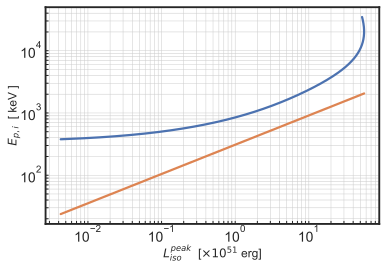

In [273]:
plt.xscale('log')
plt.yscale('log')

# plt.xlim([0.0001,1000])#([1e50,1e55])
# plt.ylim([100,1e5])#([100,2*10**4])

plt.tick_params(direction='in', which='both', length=3, width=1, labelright=False, axis='both')
plt.minorticks_off
plt.grid(True, which='both', lw = 0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'$L^{peak}_{iso}$  [$\times 10^{51}$ erg]',fontsize=12, labelpad=0)
plt.ylabel('$E_{p,i}$  [ keV ]',fontsize=12,labelpad=0)

plt.plot(some_curve_x, some_curve_y)#
# plt.scatter(xlistc1, ylistc1,lw=1.0)#, s=2.0, color='green', zorder=2)
plt.plot(some_curve_x, some_curve_l)#
# plt.scatter(xlistc2, ylistc2, lw=1.0)

# IP_x = Main_Curve_and_Main_Line_Intersect_point.get_x()
# IP_y = Main_Curve_and_Main_Line_Intersect_point.get_y()

# plt.scatter(IP_x, IP_y, s=5.0, color='magenta', zorder=3)
plt.show()

In [256]:
names_and_model = myastro.get_all_names_with_model('browse_results-3.fits')
print(names_and_model[0].shape)
print(names_and_model[1].shape)
a = names_and_model[1]
a


(561,)
(561,)


chararray(['pflx_plaw', 'pflx_plaw', 'pflx_comp', 'pflx_plaw',
           'pflx_plaw', 'pflx_plaw', 'pflx_plaw', 'pflx_comp',
           'pflx_plaw', 'pflx_plaw', 'pflx_plaw', 'pflx_plaw',
           'pflx_plaw', 'pflx_plaw', 'pflx_plaw', 'pflx_plaw',
           'pflx_plaw', 'pflx_plaw', 'pflx_comp', 'pflx_comp',
           'pflx_plaw', 'pflx_comp', 'pflx_comp', 'pflx_plaw',
           'pflx_plaw', 'pflx_plaw', '', 'pflx_plaw', 'pflx_comp',
           'pflx_comp', '', 'pflx_plaw', '', 'pflx_comp', 'pflx_plaw',
           'pflx_band', 'pflx_comp', 'pflx_plaw', 'pflx_comp',
           'pflx_comp', 'pflx_comp', 'pflx_plaw', 'pflx_plaw', '', '',
           'pflx_plaw', 'pflx_comp', 'pflx_plaw', 'pflx_comp',
           'pflx_plaw', 'pflx_comp', 'pflx_plaw', 'pflx_comp',
           'pflx_plaw', 'pflx_comp', 'pflx_comp', 'pflx_plaw',
           'pflx_comp', 'pflx_plaw', 'pflx_comp', 'pflx_plaw',
           'pflx_plaw', 'pflx_comp', 'pflx_plaw', 'pflx_comp',
           'pflx_comp', '', 'pflx_p

In [257]:
nmsorted = myastro.sort_name_by_models(names_and_model)
nmsorted[0], nmsorted[1]

joint_list = np.vstack((nmsorted[0],nmsorted[1])).T
len(nmsorted[0]), len(nmsorted[1]), joint_list

(147,
 147,
 array([['GRB080802386', 'pflx_comp'],
        ['GRB081012045', 'pflx_comp'],
        ['GRB081204517', 'pflx_comp'],
        ['GRB081209981', 'pflx_comp'],
        ['GRB081216531', 'pflx_comp'],
        ['GRB081223419', 'pflx_comp'],
        ['GRB090108020', 'pflx_comp'],
        ['GRB090108322', 'pflx_comp'],
        ['GRB090206620', 'pflx_comp'],
        ['GRB090227772', 'pflx_band'],
        ['GRB090228204', 'pflx_comp'],
        ['GRB090308734', 'pflx_comp'],
        ['GRB090328713', 'pflx_comp'],
        ['GRB090331681', 'pflx_comp'],
        ['GRB090510016', 'pflx_comp'],
        ['GRB090531775', 'pflx_comp'],
        ['GRB090617208', 'pflx_comp'],
        ['GRB090621922', 'pflx_comp'],
        ['GRB090802235', 'pflx_comp'],
        ['GRB090814368', 'pflx_comp'],
        ['GRB090907808', 'pflx_comp'],
        ['GRB090924625', 'pflx_comp'],
        ['GRB091012783', 'pflx_comp'],
        ['GRB091019750', 'pflx_comp'],
        ['GRB091126333', 'pflx_comp'],
        ['GRB